1a.

In [31]:
import pandas as pd
red_wine_df = pd.read_csv(r"C:\Users\John\Desktop\Jack Stuff\Data Sets\winequality-red.csv", sep=';')
white_wine_df = pd.read_csv(r"C:\Users\John\Desktop\Jack Stuff\Data Sets\winequality-white.csv", sep=';')
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'
wine_df = pd.concat([red_wine_df, white_wine_df], axis=0, ignore_index=True)

1b. The data set is large so I opted to use a 60:20:20 ratio for training, testing, and validation sets. This is will prevent overfitting because the training dataset is large enough, and there will still be sufficient data for validation and testing. 

In [32]:
train_df = wine_df.sample(frac=0.6, random_state=42)
test_df = wine_df.drop(train_df.index).sample(frac=0.5, random_state=42)
val_df = wine_df.drop(train_df.index).drop(test_df.index)

1c.

In [33]:
corr_matrix = wine_df.corr()
print(corr_matrix['density'].sort_values(ascending=False))
print('\nThe most linear properties are: alcohol, residual sugar, fixed acidity, chlorides, quality')

density                 1.000000
residual sugar          0.552517
fixed acidity           0.458910
chlorides               0.362615
volatile acidity        0.271296
sulphates               0.259478
citric acid             0.096154
total sulfur dioxide    0.032395
free sulfur dioxide     0.025717
pH                      0.011686
quality                -0.305858
alcohol                -0.686745
Name: density, dtype: float64

The most linear properties are: alcohol, residual sugar, fixed acidity, chlorides, quality


1d. 

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set target and predictor variables
target = 'density'
predictors = ['alcohol', 'residual sugar','fixed acidity', 'chlorides', 'quality']

# Define function for stepwise forward selection
def stepwise_forward_selection(data, target, predictors):
    remaining_predictors = set(predictors)
    selected_predictors = []
    rss_list = []
    
# Select the predictor with the lowest RSS value and add it to the model
    while remaining_predictors:
        best_rss = float('inf')

# Iterate through remaining predictors and add them to the model
        for candidate in remaining_predictors:
            model = LinearRegression()
            X = data[selected_predictors + [candidate]]
            y = data[target]
# Fit linear regression model and make predictions
            model.fit(X, y)
            y_pred = model.predict(X)
# Calculate RSS value
            rss = mean_squared_error(y, y_pred) * len(y)

# If the current model has a lower RSS than the previous models, select this predictor as the best
            if rss < best_rss:
                best_rss = rss
                best_candidate = candidate

# Remove best candidate from remaining predictors and add it to selected predictors list     
        remaining_predictors.remove(best_candidate)
        selected_predictors.append(best_candidate)
        rss_list.append(best_rss)
# Return the final list of selected predictors and their RSS values
    return selected_predictors, rss_list

selected_predictors, rss_list = stepwise_forward_selection(train_df, target, predictors)

for i in range(len(selected_predictors)):
    print(f"\nRegression {i+1}: {selected_predictors[:i+1]}")
    print(f"RSS: {rss_list[i]}")



Regression 1: ['alcohol']
RSS: 0.01748111426705374

Regression 2: ['alcohol', 'fixed acidity']
RSS: 0.01195914517613238

Regression 3: ['alcohol', 'fixed acidity', 'residual sugar']
RSS: 0.007203267481181568

Regression 4: ['alcohol', 'fixed acidity', 'residual sugar', 'chlorides']
RSS: 0.006343808597728961

Regression 5: ['alcohol', 'fixed acidity', 'residual sugar', 'chlorides', 'quality']
RSS: 0.006311310540341453


1e. 

In [35]:
# Select training predictors and target
X_train = train_df[['alcohol', 'residual sugar','fixed acidity', 'chlorides', 'quality']]
y_train = train_df['density']

# Create a Linear Regression model
model = LinearRegression()

# Fit model on the training data
model.fit(X_train, y_train)

# Select test predictors and target
X_test = test_df[['alcohol', 'residual sugar','fixed acidity', 'chlorides', 'quality']]
y_test = test_df['density']

# Make predictions on test data using the trained model
y_pred_test = model.predict(X_test)

# Calculate mean squared error between the predicted and actual values on the test data
mse_test = mean_squared_error(y_test, y_pred_test)

print('The MSE of the model on the test data is', mse_test)


The MSE of the model on the test data is 1.5502067960519827e-06


1f.

In [36]:
# Select the predictors for  validation data
X_val = val_df[['alcohol', 'residual sugar', 'fixed acidity', 'chlorides', 'quality']]
# Select the target variable for  validation data
y_val = val_df['density']

# Use model to predict the target variable for validation data
y_pred_val = model.predict(X_val)

# Calculate mean squared error between the predicted and actual target variables for validation data
mse_val = mean_squared_error(y_val, y_pred_val)

print('Choice 3) The MSE of the model on the validation data is', mse_val)

Choice 3) The MSE of the model on the validation data is 2.007891978484558e-06


2.

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings

from sklearn.model_selection import train_test_split

# Select all columns except 'wine_type' column as features
X = wine_df.drop('wine_type', axis=1)

# Select 'wine_type' column as the target variable
y = wine_df['wine_type']

# Split the data into training and testing sets
# Use 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the test set into validation and testing sets and use 50% of test set for validation and remaining 50% for testing
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)


(3898, 12) (1300, 12) (1299, 12)


In [38]:
# Extract the column names from the X DataFrame and store them in a list
wine_columns = [i for i in X.columns]

print(wine_columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [28]:
!pip install category_encoders


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
# Define encoder using the wine_columns list
encoder = ce.OrdinalEncoder(cols=wine_columns)

# Fit encoder to the training data and transform data using the fitted encoder
X_train = encoder.fit_transform(X_train)

# Transform test and validation data using fitted encoder
X_test = encoder.transform(X_test)
X_val = encoder.transform(X_val)

# Define decision tree classifier with maximum depth of 3 and the Gini index as criterion for splitting
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the decision tree classifier to the training data
clf_gini.fit(X_train, y_train)

# Use the trained decision tree classifier to make predictions on test data
y_pred_test_gini = clf_gini.predict(X_test)

# Calculate accuracy of the decision tree classifier on the data
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_gini)))

# Use trained decision tree classifier to make predictions on training data
y_pred_train_gini = clf_gini.predict(X_train)


print('The training-set accuracy score is {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('The training set score is {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('The test set score is {:.4f}'.format(clf_gini.score(X_test, y_test)))
print('The validation set score is {:.4f}'.format(clf_gini.score(X_val, y_val)))

Model accuracy score with criterion gini index: 0.8531
The training-set accuracy score is 0.8728
The training set score is 0.8728
The test set score is 0.8531
The validation set score is 0.8591


[Text(0.5, 0.875, 'X[4] <= 38.5\ngini = 0.361\nsamples = 3898\nvalue = [921, 2977]'),
 Text(0.25, 0.625, 'X[1] <= 40.5\ngini = 0.148\nsamples = 2558\nvalue = [206, 2352]'),
 Text(0.125, 0.375, 'X[9] <= 51.5\ngini = 0.097\nsamples = 2181\nvalue = [111, 2070]'),
 Text(0.0625, 0.125, 'gini = 0.073\nsamples = 2043\nvalue = [77, 1966]'),
 Text(0.1875, 0.125, 'gini = 0.371\nsamples = 138\nvalue = [34, 104]'),
 Text(0.375, 0.375, 'X[3] <= 48.5\ngini = 0.377\nsamples = 377\nvalue = [95, 282]'),
 Text(0.3125, 0.125, 'gini = 0.482\nsamples = 202\nvalue = [82, 120]'),
 Text(0.4375, 0.125, 'gini = 0.138\nsamples = 175\nvalue = [13, 162]'),
 Text(0.75, 0.625, 'X[1] <= 36.5\ngini = 0.498\nsamples = 1340\nvalue = [715, 625]'),
 Text(0.625, 0.375, 'X[0] <= 37.5\ngini = 0.438\nsamples = 759\nvalue = [246, 513]'),
 Text(0.5625, 0.125, 'gini = 0.36\nsamples = 619\nvalue = [146, 473]'),
 Text(0.6875, 0.125, 'gini = 0.408\nsamples = 140\nvalue = [100, 40]'),
 Text(0.875, 0.375, 'X[3] <= 75.5\ngini = 0.311\

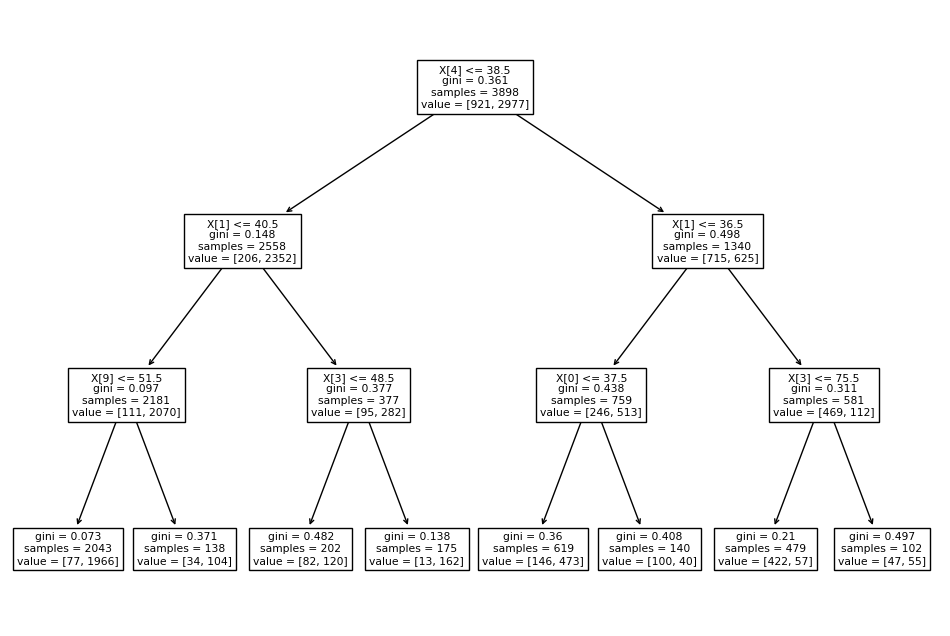

In [40]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_gini)
print('The confusion matrix is\n\n', cm)

The confusion matrix is

 [[191 159]
 [ 32 918]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_gini))

              precision    recall  f1-score   support

         red       0.86      0.55      0.67       350
       white       0.85      0.97      0.91       950

    accuracy                           0.85      1300
   macro avg       0.85      0.76      0.79      1300
weighted avg       0.85      0.85      0.84      1300



3.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = wine_df[['alcohol', 'residual sugar', 'fixed acidity', 'chlorides', 'quality']]
y = wine_df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape

((4547, 5), (975, 5), (975, 5))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_shape=(5,), activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
143/143 [==============================] - 0s 2ms/step - loss: 23.7887 - mse: 23.7887 - val_loss: 13.8998 - val_mse: 13.8998
Epoch 2/100
143/143 [==============================] - 0s 953us/step - loss: 10.8921 - mse: 10.8921 - val_loss: 7.9139 - val_mse: 7.9139
Epoch 3/100
143/143 [==============================] - 0s 1ms/step - loss: 6.8263 - mse: 6.8263 - val_loss: 5.1727 - val_mse: 5.1727
Epoch 4/100
143/143 [==============================] - 0s 913us/step - loss: 4.5216 - mse: 4.5216 - val_loss: 3.5205 - val_mse: 3.5205
Epoch 5/100
143/143 [==============================] - 0s 894us/step - loss: 3.1032 - mse: 3.1032 - val_loss: 2.5180 - val_mse: 2.5180
Epoch 6/100
143/143 [==============================] - 0s 906us/step - loss: 2.2390 - mse: 2.2390 - val_loss: 1.9319 - val_mse: 1.9319
Epoch 7/100
143/143 [==============================] - 0s 903us/step - loss: 1.7249 - mse: 1.7249 - val_loss: 1.5873 - val_mse: 1.5873
Epoch 8/100
143/143 [==============================] 

In [45]:
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Change activation to 'linear' if y_train is continuous
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
143/143 [==============================] - 0s 2ms/step - loss: 0.1587 - mse: 0.1587 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2/100
143/143 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3/100
143/143 [==============================] - 0s 981us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4/100
143/143 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 5/100
143/143 [==============================] - 0s 977us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 6/100
143/143 [==============================] - 0s 1ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/100
143/143 [==============================] - 0s 987us/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 8/100
143/143 [==============================] - 0s 1ms/s

In [46]:
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss based on the test set: {:.2f}\nThe accuracy based on the test set: {:.2f}%".format(loss, accuracy * 100))
loss, accuracy = model.evaluate(X_val, y_val)
print("The loss based on the validation set: {:.2f}\nThe accuracy based on the validation set: {:.2f}%".format(loss, accuracy * 100))

31/31 [==============================] - 0s 699us/step - loss: 3.3124e-06 - mse: 3.3124e-06
The loss based on the test set: 0.00
The accuracy based on the test set: 0.00%
31/31 [==============================] - 0s 723us/step - loss: 3.2221e-06 - mse: 3.2221e-06
The loss based on the validation set: 0.00
The accuracy based on the validation set: 0.00%
